In [46]:
#   Assignment No. 02 - Data Wrangling II

#  Create an "Academic performance" dataset of students and perform the following operations using Python.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import scipy.stats as sts
df = pd.read_csv("acad_perf.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [47]:
# preparing the df for data transformations
# remove the unwanted columns
df.pop('parental level of education')
df.pop('lunch')
df.pop('test preparation course')

# adding the values of math,reading and writing score together to create total value
df['total'] = df['math score']+df['reading score']+df['writing score']

# rename complicated names to something simpler
df.rename(columns={"race/ethnicity":"group"}, inplace=True)
df

,gender,group,math score,reading score,writing score,total
0,female,group B,72,72,74,218
1,female,group C,69,90,88,247
2,female,group B,90,95,93,278
3,male,group A,47,57,44,148
4,male,group C,76,78,75,229
...,...,...,...,...,...,...
995,female,group E,88,99,95,282
996,male,group C,62,55,55,172
997,female,group C,59,71,65,195
998,female,group D,68,78,77,223


In [48]:
# 1. Scan all variables for missing values and inconsistencies.
# If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them.

df.info()

# from the output, no null values are present


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         1000 non-null   object
 1   group          1000 non-null   object
 2   math score     1000 non-null   int64 
 3   reading score  1000 non-null   int64 
 4   writing score  1000 non-null   int64 
 5   total          1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


<AxesSubplot:xlabel='group', ylabel='total'>

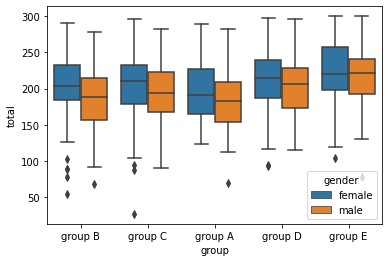

In [49]:
# 2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them.
sns.boxplot(data=df, x='group', y='total', hue='gender')

In [50]:
# here outliers are the failed students, we can seperate them from the group, lets consider students below 105 total score as failed.
df.loc[df['total'] < 105, 'grade'] = 'fail'
df.loc[df['total'] > 104, 'grade'] = 'pass'

# use this function to seperate categorical values from the numerical values
failed = df['grade'] == 'fail'
df[failed]



,gender,group,math score,reading score,writing score,total,grade
17,female,group B,18,32,28,78,fail
59,female,group C,0,17,10,27,fail
76,male,group E,30,26,22,78,fail
91,male,group C,27,34,36,97,fail
145,female,group C,22,39,33,94,fail
211,male,group C,35,28,27,90,fail
327,male,group A,28,23,19,70,fail
338,female,group B,24,38,27,89,fail
363,female,group D,27,34,32,93,fail
466,female,group D,26,31,38,95,fail


<AxesSubplot:xlabel='group', ylabel='total'>

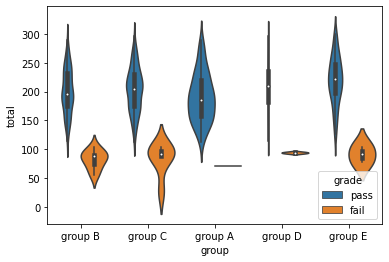

In [51]:
# Create a violin plot to observe the passed and failed students.
sns.violinplot(data=df, x="group", y="total", hue="grade")

In [52]:
# 3. Apply data transformations on at least one of the variables.
# The purpose of this transformation should be one of the following reasons:
# to change the scale for better understanding of the variable,
# to convert a non-linear relation into a linear one, or
# to decrease the skewness and convert the distribution into a normal distribution.

#before normalization dataset
b_norm = df[['math score','reading score','writing score', 'total']]
# after normalization dataset
a_norm = sts.zscore(b_norm)
a_norm

,math score,reading score,writing score,total
0,0.390024,0.193999,0.391492,0.343574
1,0.192076,1.427476,1.313269,1.021927
2,1.577711,1.770109,1.642475,1.747064
3,-1.259543,-0.833899,-1.583744,-1.293830
4,0.653954,0.605158,0.457333,0.600881
...,...,...,...,...
995,1.445746,2.044215,1.774157,1.840630
996,-0.269803,-0.970952,-0.859491,-0.732434
997,-0.467751,0.125472,-0.201079,-0.194430
998,0.126093,0.605158,0.589015,0.460532


In [53]:
# observe std deviation, min and max values.
# the values are normalized near to 1
# maximum value is 2.2375, minimum value is -4.360728
a_norm.describe()

,math score,reading score,writing score,total
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,8.704149e-17,2.167155e-16,-1.350031e-16,-2.771117e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-4.360728e+00,-3.574960e+00,-3.822345e+00,-4.124201e+00
25%,-5.997164e-01,-6.968462e-01,-6.784278e-01,-6.622599e-01
50%,-5.872457e-03,5.694554e-02,6.228578e-02,3.948484e-02
75%,7.199368e-01,6.736842e-01,7.206978e-01,6.944466e-01
max,2.237538e+00,2.112741e+00,2.103363e+00,2.261677e+00
